# EDA

## IOA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from patsy import dmatrices, dmatrix
import statsmodels.api as sm

import plotly.tools as tls



%matplotlib inline

DATA_DIR = './02/'

/home/vagrant/.anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
df = pd.read_csv(DATA_DIR + '2016-FCC-New-Coders-Survey-Data.csv', low_memory=False)

In [22]:
df.info(verbose='true')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 113 columns):
Age                             float64
AttendedBootcamp                float64
BootcampFinish                  float64
BootcampFullJobAfter            float64
BootcampLoanYesNo               float64
BootcampMonthsAgo               float64
BootcampName                    object
BootcampPostSalary              float64
BootcampRecommend               float64
ChildrenNumber                  float64
CityPopulation                  object
CodeEventBootcamp               float64
CodeEventCoffee                 float64
CodeEventConferences            float64
CodeEventDjangoGirls            float64
CodeEventGameJam                float64
CodeEventGirlDev                float64
CodeEventHackathons             float64
CodeEventMeetup                 float64
CodeEventNodeSchool             float64
CodeEventNone                   float64
CodeEventOther                  object
CodeEventRail

In [4]:
df.describe()

/home/vagrant/.anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning:

Invalid value encountered in percentile



,Age,AttendedBootcamp,BootcampFinish,BootcampFullJobAfter,BootcampLoanYesNo,BootcampMonthsAgo,BootcampPostSalary,BootcampRecommend,ChildrenNumber,CodeEventBootcamp,...,ResourceReddit,ResourceSkillCrush,ResourceSoloLearn,ResourceStackOverflow,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3Schools,ResourceYouTube,StudentDebtOwe
count,13613.000000,15380.000000,933.000000,635.000000,934.000000,631.000000,330.000000,937.000000,2554.000000,42.0,...,29.0,36.0,30.0,191.0,422.0,3306.0,4130.0,121.0,121.0,3514.000000
mean,29.175421,0.061964,0.689175,0.584252,0.332976,9.055468,63740.506061,0.785486,1.896241,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,34556.143711
std,9.017716,0.241097,0.463080,0.493239,0.471531,12.968035,26347.200265,0.410704,1.115975,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54423.139781
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,0.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,86.000000,1.000000,1.000000,1.000000,1.000000,220.000000,200000.000000,1.000000,18.000000,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1000000.000000


In [5]:
# opting not to clean up column names as they're only CamelCase, 
# no oher invalid characters observed

#df.columns = map(str.lower, df.columns)

In [6]:
#g = sns.pairplot(df, size=1);

In [7]:
#df = df.select_dtypes(include=[np.number])

/home/vagrant/.anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



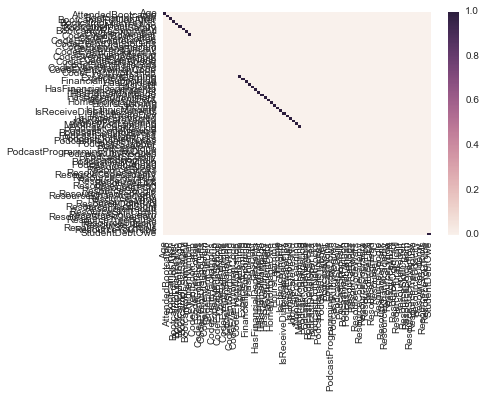

In [8]:
sns.heatmap(df.corr() > 0.9);

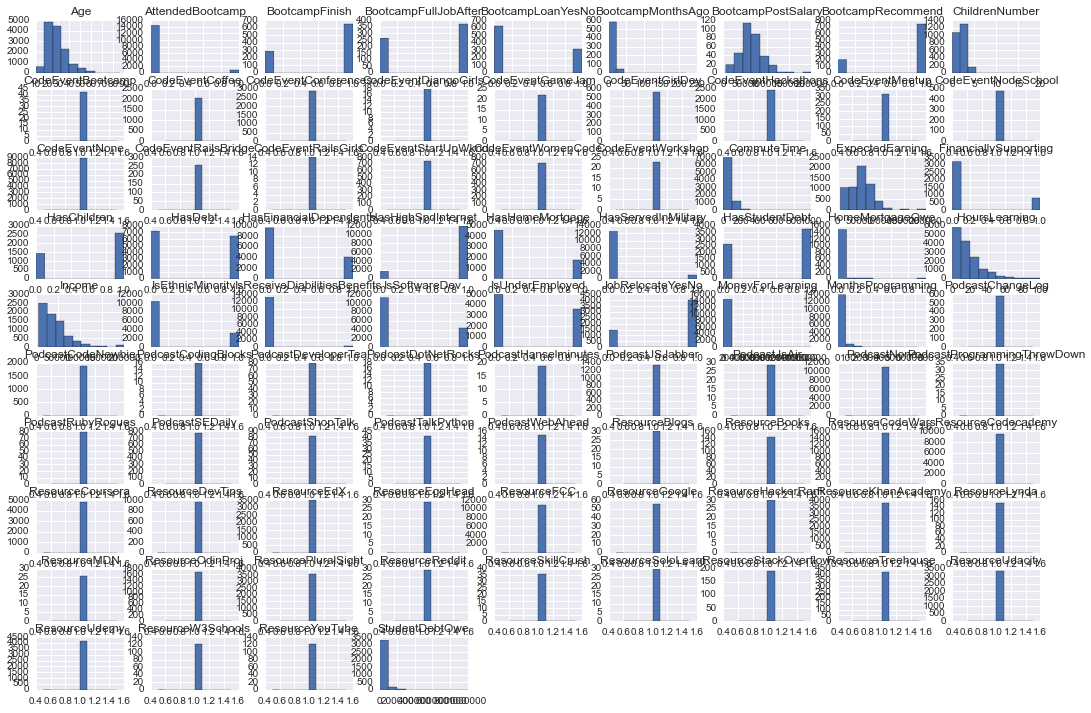

In [9]:
df.hist(bins=10,figsize=(18,12));

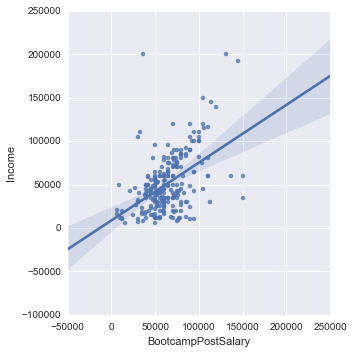

In [10]:
sns.lmplot("BootcampPostSalary", "Income", df);

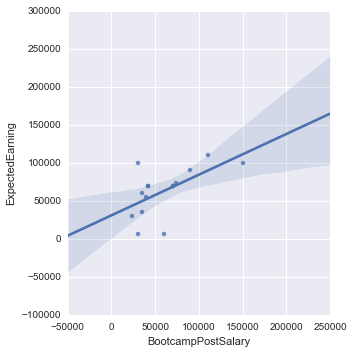

In [11]:
sns.lmplot("BootcampPostSalary", "ExpectedEarning", df);

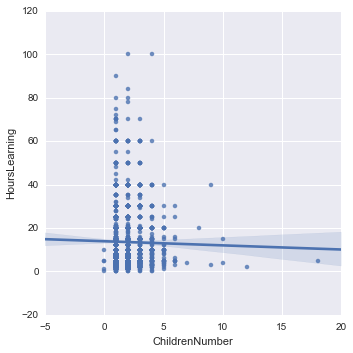

In [12]:
sns.lmplot("ChildrenNumber", "HoursLearning", df);

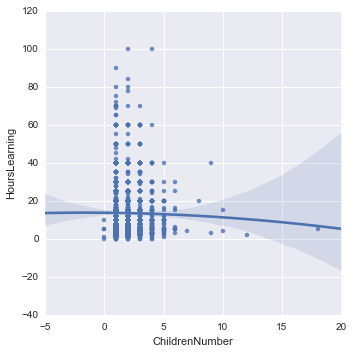

In [13]:
sns.lmplot("ChildrenNumber", "HoursLearning", df, order=2);

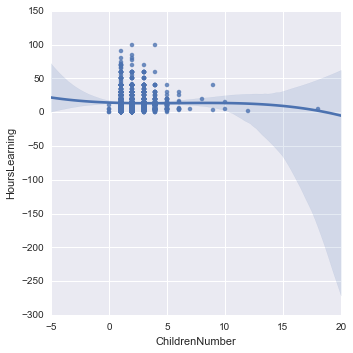

In [14]:
sns.lmplot("ChildrenNumber", "HoursLearning", df, order=3);

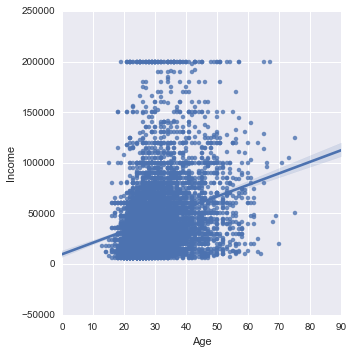

In [15]:
sns.lmplot("Age", "Income", df);

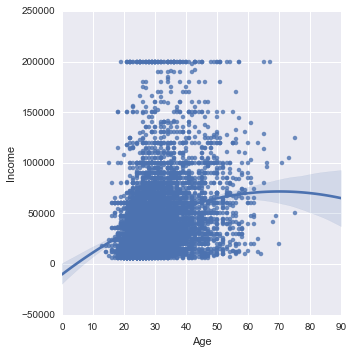

In [16]:
sns.lmplot("Age", "Income", df, order=2);

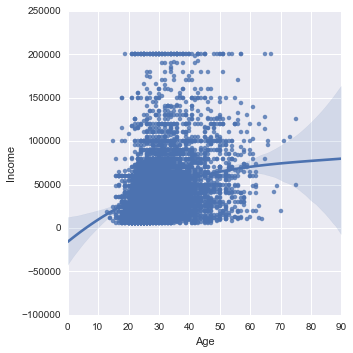

In [17]:
sns.lmplot("Age", "Income", df, order=3);

In [18]:
i = df.index.tolist()

train = df.ix[i[:12000]]
test = df.ix[i[12000:]]

In [19]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
log_lm = linear_model.LinearRegression()

In [20]:
income = [ [x] for x in df['Income'].values ]
age = df['Age'].values

In [21]:
lm.fit(income, age)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').